# Learning Overlapping Representations for the Estimation of Individualized Treatment Effects (AISTATS 2020)

In this notebook, we show how to use DKLITE to estimate Individualized Treatment Effect (ITE) on an IHDP simulation. In the experiment, we demonstrate DKLITE can learn a smooth data representation via variance minimization, and leverage the predicted variance to improve prediction performance.



In [1]:
from model import DKLITE
from utils_ import *
import pickle


''' Import a simluated IHDP data '''
X_train, Y_train, W_train, X_test, T_true_train, T_true_test =  pickle.load(open('data/ihdp_simulation.pickle', 'rb'))

''' Compute the sample size of training and testing set '''
N_train,input_dim = np.shape(X_train)
N_test = np.shape(X_test)[0]



Train DKLITE on the IHDP data and report the square root of PEHE

In [2]:

''' Model Training'''
model = DKLITE(input_dim=input_dim, output_dim=1)

model.fit(X_train, Y_train, W_train, 1000)


''' Predict the treated and control outcomes'''
Y_hat_train, Y_hat_test = model.pred(X_train, Y_train, W_train, X_test)


''' Compute the square root of PEHE'''
r_PEHE_train = compute_PEHE(Y_hat_train[:,1]-Y_hat_train[:,0],T_true_train)

r_PEHE_test = compute_PEHE(Y_hat_test[:,1]-Y_hat_test[:,0], T_true_test)



print('r-PEHE_train:', r_PEHE_train, 'r-PEHE_test:', r_PEHE_test)

r-PEHE_train: 0.3028152031976677 r-PEHE_test: 0.2864103410707825


Now we use T-SNE to compare compare the the raw data with the represented data via the feature map in DKLITE. We first show the embedded control and treated group, in purple and yellow, respectively. Then we show the heatmap w.r.t the predictive control outcomes.

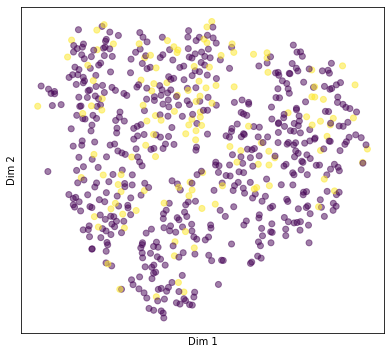

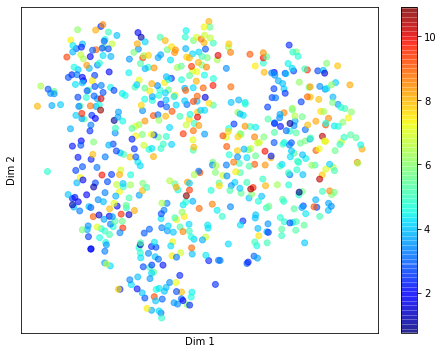

In [3]:
''' Visualize the T-SNE embedding of the raw data'''
plot_tnse_embedding(X_train, Y_train, W_train)

Now we demonstrate the predictive variance can improve the model performance by removing uncertain predictions. We remove the data points one by one according to their predictive variances from the largest to the smallest. As a comparison, we show the PEHE obtained by removing data according to true estimation error from the largest to the smallest. We demonstrate the predictive variance of DKLITE can improve model performance by removing the top 10% most uncertain prediction.

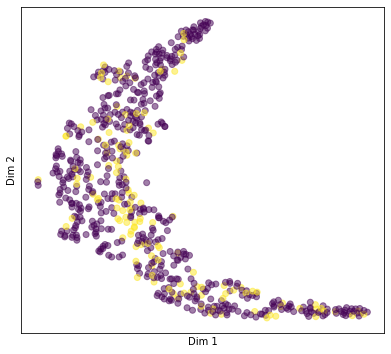

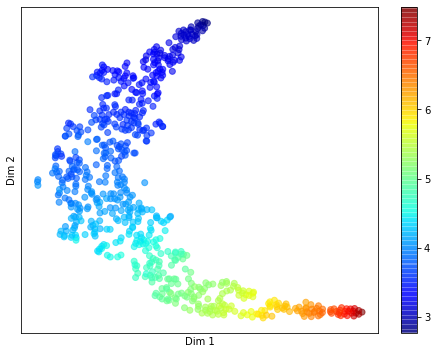

In [4]:
''' Compute the data representation'''
Z_embedding = model.embed(X_train, Y_train, W_train)

''' Visualize the T-SNE embedding of the data representation'''
plot_tnse_embedding(Z_embedding, Y_hat_train, W_train)

In [5]:


''' Compute the predictive variance of each input data '''
var_0_tr,var_1_tr,var_0_te,var_1_te = model.element_var(X_train, Y_train, W_train, X_test)


In [6]:
error_ground_true, error_variance  = remove_uncertain_data(var_0_tr, var_1_tr, T_true_train, Y_hat_train)

print('Error after removing data w.r.t predictive variance:',error_variance)

print('Error after removing data w.r.t ground true error:',error_ground_true)

Error after removing data w.r.t predictive variance: 0.28009531081052025
Error after removing data w.r.t ground true error: 0.23033744679540974
